In [1]:
import numpy as np
import imutils
import matplotlib.pyplot as plt
import pytesseract
import cv2
import math
import os
import re
import numpy as np
import imutils
import matplotlib.pyplot as plt
import cv2
import math
import os
import re
from color_utils import extractColoredBoundingBox, getFinalPts, getHeatMapColorDifference
from image_utils import extract_yellowcircles, changeFormat
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import imutils
import matplotlib.pyplot as plt
import cv2
import math
from color_utils import extractColoredBoundingBox, getFinalPts, getHeatMapColorDifference
from image_utils import extract_yellowcircles, changeFormat
from utils import calculateSimilarity, generateResultsBulk
import pandas as pd


entries = []

# Specify the base folder and the results folder
input_folder = "stand images"
results_folder = "results"
df = generateResultsBulk(input_folder, results_folder)

20mM Dry [(45.22331621004566, 80.52204623287672), (45.45099417946014, 79.22637603031369), (42.80637518845574, 75.55039844927849), (45.117987847958176, 80.93669634025717)]
20mM Dry [(46.325542219414615, 81.5168667087808), (46.808689440732806, 81.52737509979411), (43.34528344163119, 76.71125550825305), (43.27077317933911, 76.47096567212063)]
20mM Dry [(42.76816900223036, 74.95257332828346), (42.62873918908197, 75.51317146711101), (43.63689116164364, 76.06227106227107), (43.56572645023949, 75.03704097924428)]
20mM Dry [(42.692020879940344, 73.7909105973983), (47.21612614809396, 83.81089978054133), (45.97315436241611, 81.42797219558965), (44.92331586099787, 77.34521452145215)]
20mM Dry [(43.212199615821866, 77.32043592457563), (45.72541829016731, 79.65230346092139), (42.61475839277798, 75.51473018175956), (44.16565656565656, 77.14028282828284)]
20mM Dry [(44.42737265098688, 78.03057164243785), (45.696707224857356, 81.36505808757819), (46.565971021176836, 83.13751489296284), (46.22469955724

In [3]:
import cv2
print("OpenCV version:", cv2.__version__)
from platform import python_version

print(python_version())
!pip list


OpenCV version: 4.7.0
3.8.16
Package                  Version
------------------------ ---------------
access                   1.1.9
affine                   2.4.0
anyio                    3.6.2
appnope                  0.1.3
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
astunparse               1.6.3
async-lru                2.0.2
attrs                    22.2.0
Babel                    2.12.1
backcall                 0.2.0
beautifulsoup4           4.11.1
black                    23.3.0
bleach                   6.0.0
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       3.1.0
click                    8.1.3
click-plugins            1.1.1
cligj                    0.7.2
clingo                   5.6.2
comm                     0.1.2
contextvars              2.4
contourpy                1.0.7
cycler                   0.11.0
debugpy                  1.6.6
decorator          

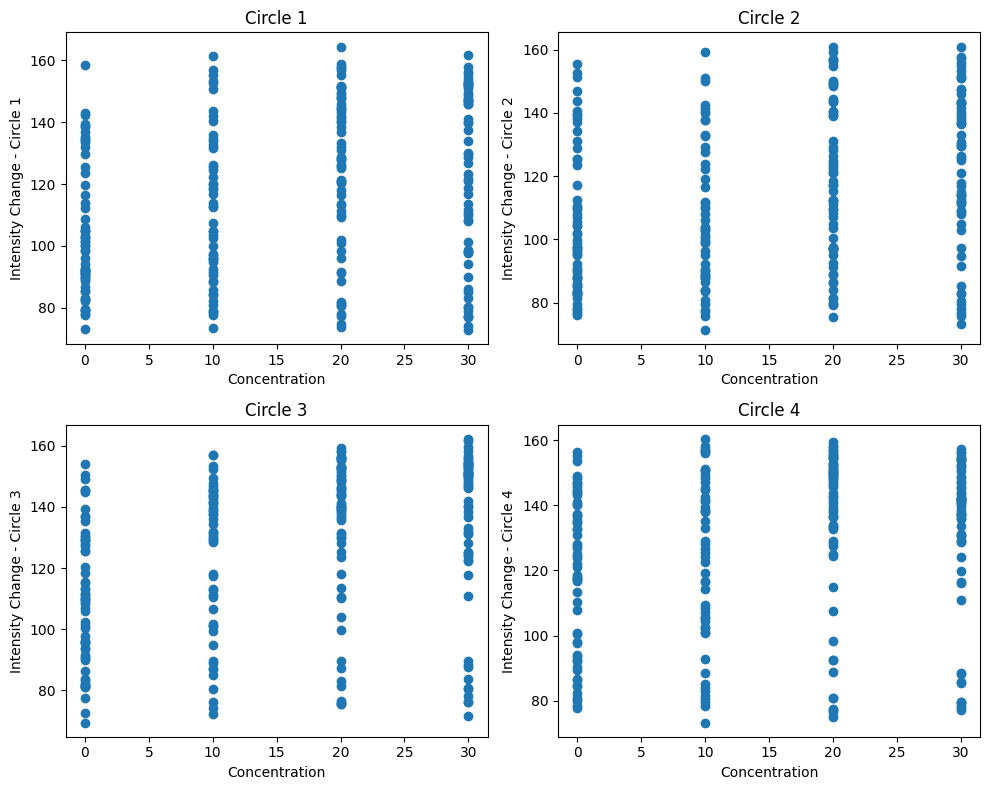

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'Sample Name', 'Circle 1 Intensity Change', 'Circle 2 Intensity Change', 'Circle 3 Intensity Change', 'Circle 4 Intensity Change'

# Create a dictionary mapping concentration values to corresponding numeric values
concentration_mapping = {'0mM': 0, '10mM': 10, '20mM': 20, '30mM': 30}

# Create a new column 'Concentration-val' based on the mapping
df['Concentration-val'] = df['Concentration'].map(concentration_mapping)

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot intensity change for each circle in a subplot
axs[0, 0].scatter(df['Concentration-val'], df['Circle 1 Intensity Change'])
axs[0, 0].set_xlabel("Concentration")
axs[0, 0].set_ylabel("Intensity Change - Circle 1")
axs[0, 0].set_title("Circle 1")

axs[0, 1].scatter(df['Concentration-val'], df['Circle 2 Intensity Change'])
axs[0, 1].set_xlabel("Concentration")
axs[0, 1].set_ylabel("Intensity Change - Circle 2")
axs[0, 1].set_title("Circle 2")

axs[1, 0].scatter(df['Concentration-val'], df['Circle 3 Intensity Change'])
axs[1, 0].set_xlabel("Concentration")
axs[1, 0].set_ylabel("Intensity Change - Circle 3")
axs[1, 0].set_title("Circle 3")

axs[1, 1].scatter(df['Concentration-val'], df['Circle 4 Intensity Change'])
axs[1, 1].set_xlabel("Concentration")
axs[1, 1].set_ylabel("Intensity Change - Circle 4")
axs[1, 1].set_title("Circle 4")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


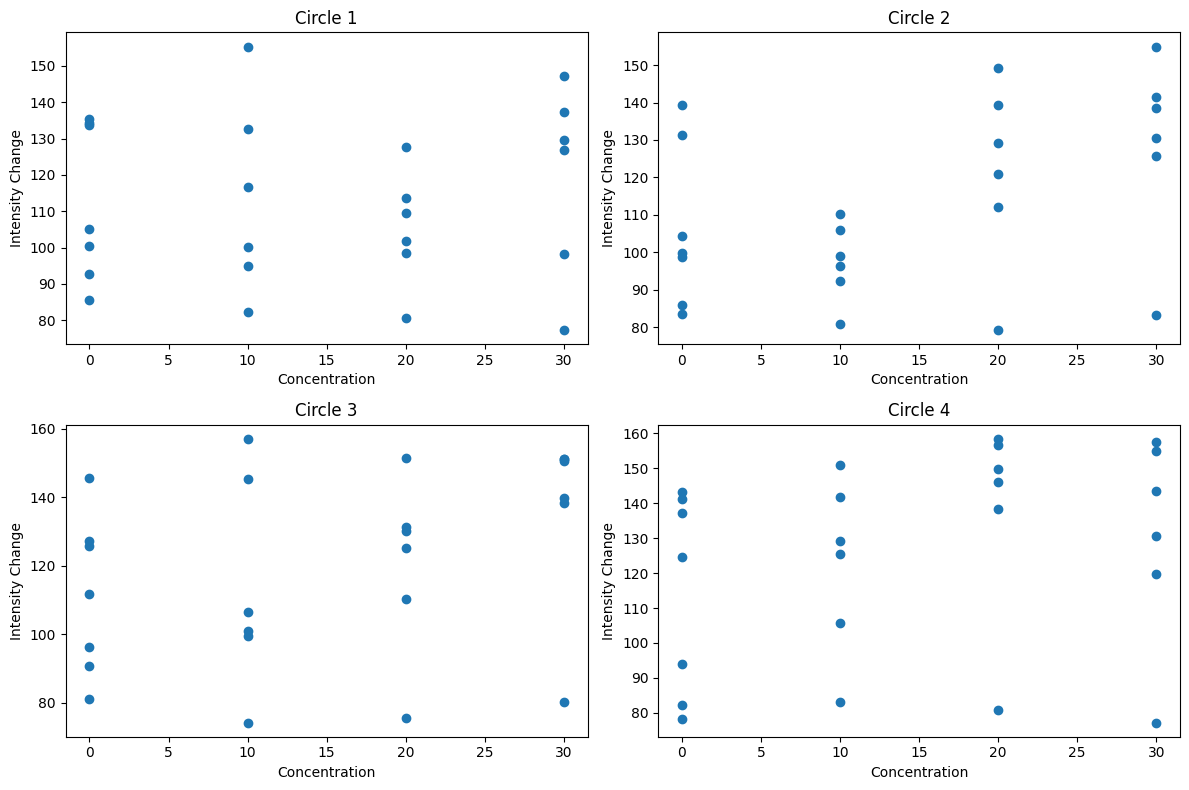

,Concentration,Sample Type,Sample Number,Circle 1 Pixels Changed,Circle 1 Intensity Change,Circle 2 Pixels Changed,Circle 2 Intensity Change,Circle 3 Pixels Changed,Circle 3 Intensity Change,Circle 4 Pixels Changed,Circle 4 Intensity Change,Concentration-val
0,20mM,Dry,1,45.223316,80.522046,45.450994,79.226376,42.806375,75.550398,45.117988,80.936696,20
1,20mM,Dry,2,46.325542,81.516867,46.808689,81.527375,43.345283,76.711256,43.270773,76.470966,20
2,20mM,Dry,3,42.768169,74.952573,42.628739,75.513171,43.636891,76.062271,43.565726,75.037041,20
3,20mM,Dry,4,42.692021,73.790911,47.216126,83.810900,45.973154,81.427972,44.923316,77.345215,20
4,20mM,Dry,5,43.212200,77.320436,45.725418,79.652303,42.614758,75.514730,44.165657,77.140283,20
...,...,...,...,...,...,...,...,...,...,...,...,...
232,10mM,Normal light,6,78.746425,153.193508,73.001328,132.737716,73.424943,142.886904,75.134021,141.330997,10
233,10mM,Normal light,7,52.305665,96.070707,65.720272,119.009428,55.831046,101.572222,66.117088,124.165809,10
234,10mM,Normal light,8,48.841502,88.246740,55.168395,98.917169,72.642324,137.608677,62.631322,114.347626,10
235,10mM,Normal light,9,65.043984,119.911120,57.625104,100.908079,69.078921,130.732204,79.303419,145.283248,10


In [10]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'Circle Number', 'Concentration-val', and 'Intensity Change'

# Specify the number of circles
num_circles = 4
concentration_mapping = {'0mM': 0, '10mM': 10, '20mM': 20, '30mM': 30}

# Create a new column 'Concentration-val' based on the mapping
df['Concentration-val'] = df['Concentration'].map(concentration_mapping)

# import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'Circle', 'Concentration', and 'Intensity Change'

# Specify the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 2

# Create a new figure and subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
sampleNumber = 1
# Iterate over each circle and plot the 'Intensity Change' against 'Concentration'
for circle in range(1, 5):
    # Filter the DataFrame for the specific circle
    filtered_df = df[df['Sample Number'] == sampleNumber]

    # Determine the subplot coordinates
    row = (circle - 1) // num_cols
    col = (circle - 1) % num_cols

    # Plot the data in the corresponding subplot
    ax = axes[row, col]
    ax.plot(filtered_df['Concentration-val'], filtered_df['Circle '+ str(circle) + ' Intensity Change'], marker='o', linestyle='')
    ax.set_xlabel('Concentration')
    ax.set_ylabel('Intensity Change')
    ax.set_title(f'Circle {circle}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
df

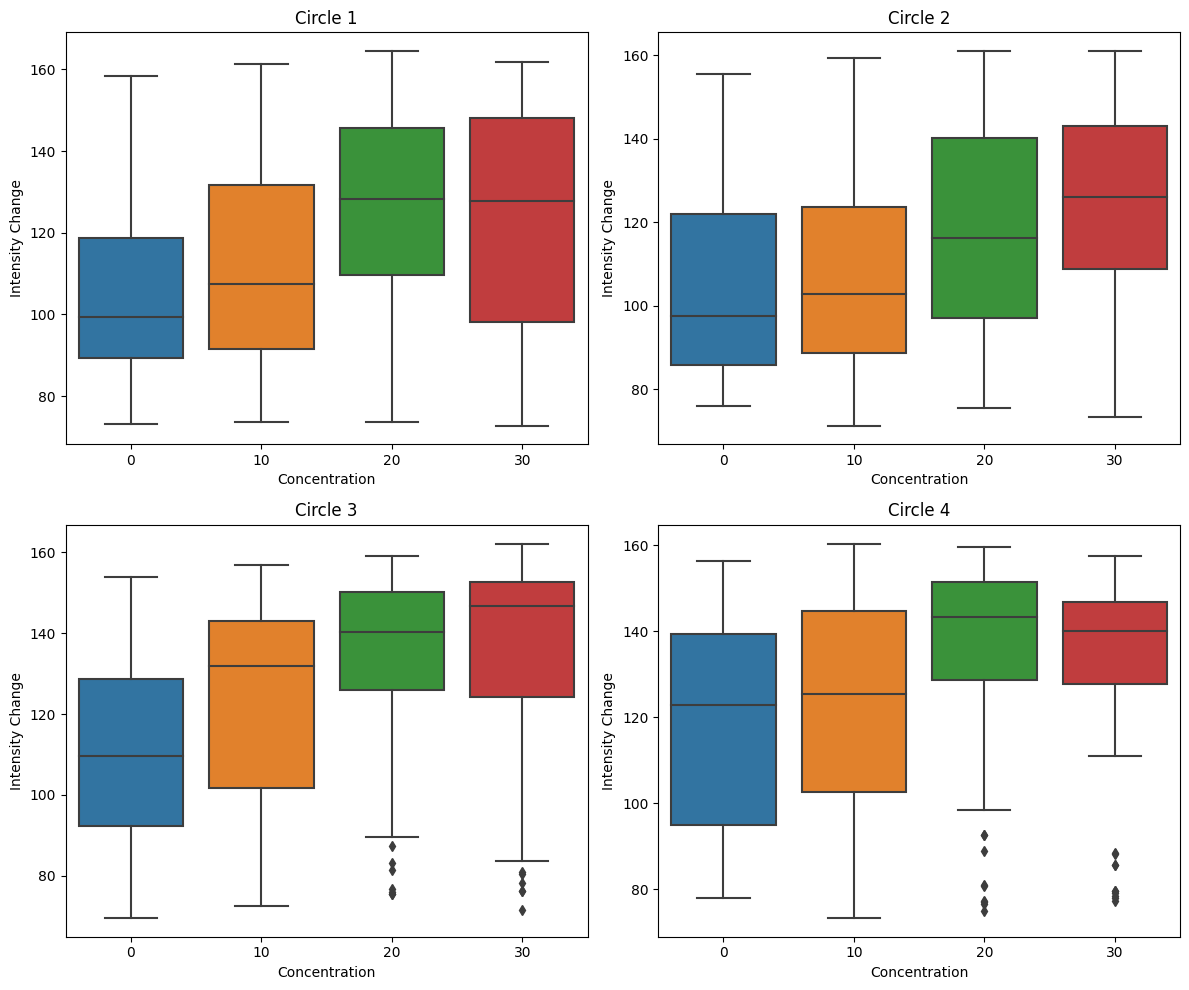

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and Aggregation: Mean Intensity Change by Concentration for each circle
mean_pixels_circle1 = df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 1 Intensity Change'].mean().reset_index()
mean_pixels_circle2 = df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 2 Intensity Change'].mean().reset_index()
mean_pixels_circle3 = df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 3 Intensity Change'].mean().reset_index()
mean_pixels_circle4 = df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 4 Intensity Change'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Plot boxplots for Circle 1
sns.boxplot(x='Concentration-val', y='Circle 1 Intensity Change', data=mean_pixels_circle1, ax=axes[0, 0])
axes[0, 0].set_title('Circle 1')
axes[0, 0].set_xlabel('Concentration')
axes[0, 0].set_ylabel('Intensity Change')

# Plot boxplots for Circle 2
sns.boxplot(x='Concentration-val', y='Circle 2 Intensity Change', data=mean_pixels_circle2, ax=axes[0, 1])
axes[0, 1].set_title('Circle 2')
axes[0, 1].set_xlabel('Concentration')
axes[0, 1].set_ylabel('Intensity Change')

# Plot boxplots for Circle 3
sns.boxplot(x='Concentration-val', y='Circle 3 Intensity Change', data=mean_pixels_circle3, ax=axes[1, 0])
axes[1, 0].set_title('Circle 3')
axes[1, 0].set_xlabel('Concentration')
axes[1, 0].set_ylabel('Intensity Change')

# Plot boxplots for Circle 4
sns.boxplot(x='Concentration-val', y='Circle 4 Intensity Change', data=mean_pixels_circle4, ax=axes[1, 1])
axes[1, 1].set_title('Circle 4')
axes[1, 1].set_xlabel('Concentration')
axes[1, 1].set_ylabel('Intensity Change')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

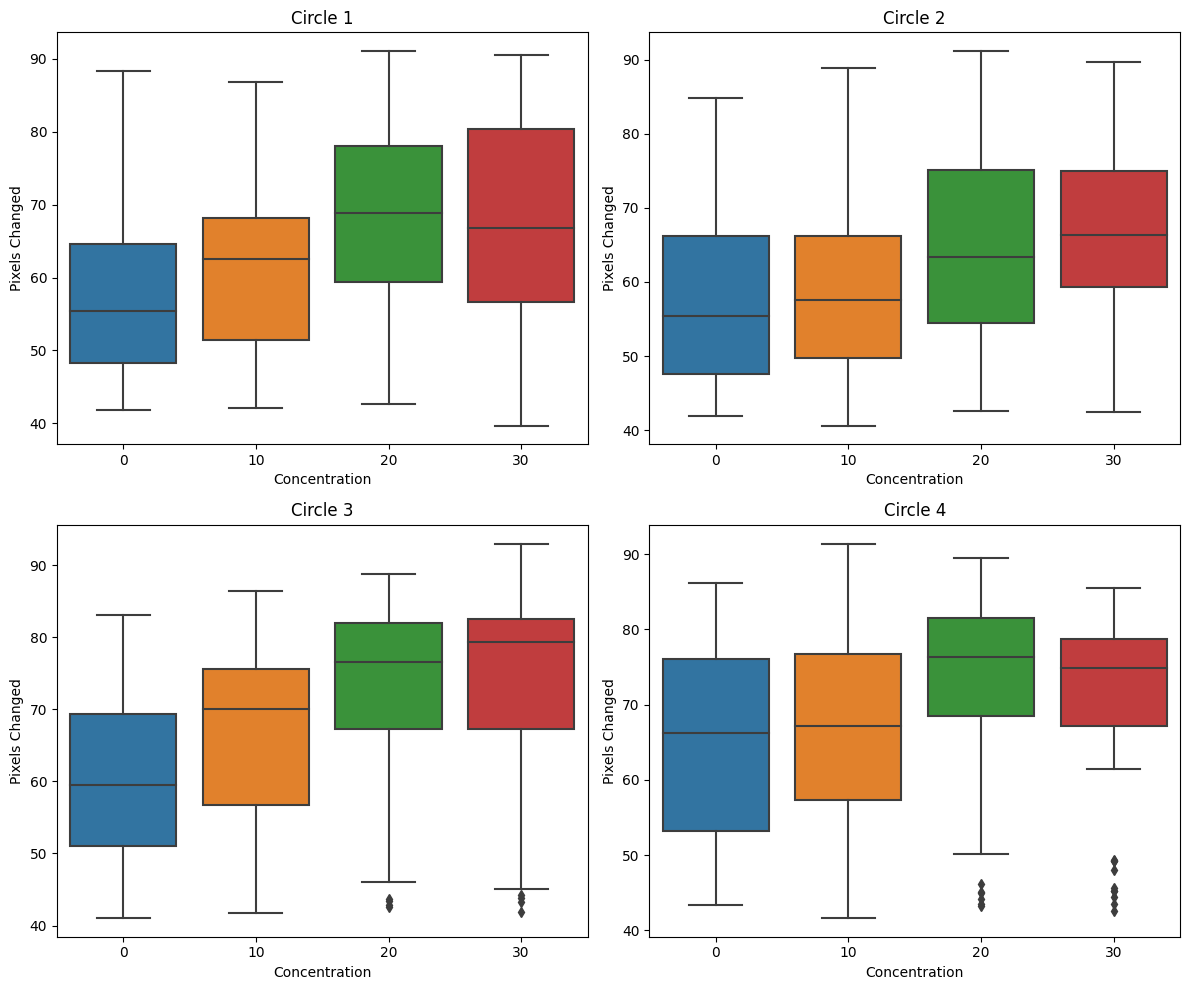

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and Aggregation: Mean Pixels Changed by Concentration for each circle
mean_pixels_circle1 = df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 1 Pixels Changed'].mean().reset_index()
mean_pixels_circle2 = df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 2 Pixels Changed'].mean().reset_index()
mean_pixels_circle3 = df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 3 Pixels Changed'].mean().reset_index()
mean_pixels_circle4 = df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 4 Pixels Changed'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Plot boxplots for Circle 1
sns.boxplot(x='Concentration-val', y='Circle 1 Pixels Changed', data=mean_pixels_circle1, ax=axes[0, 0])
axes[0, 0].set_title('Circle 1')
axes[0, 0].set_xlabel('Concentration')
axes[0, 0].set_ylabel('Pixels Changed')

# Plot boxplots for Circle 2
sns.boxplot(x='Concentration-val', y='Circle 2 Pixels Changed', data=mean_pixels_circle2, ax=axes[0, 1])
axes[0, 1].set_title('Circle 2')
axes[0, 1].set_xlabel('Concentration')
axes[0, 1].set_ylabel('Pixels Changed')

# Plot boxplots for Circle 3
sns.boxplot(x='Concentration-val', y='Circle 3 Pixels Changed', data=mean_pixels_circle3, ax=axes[1, 0])
axes[1, 0].set_title('Circle 3')
axes[1, 0].set_xlabel('Concentration')
axes[1, 0].set_ylabel('Pixels Changed')

# Plot boxplots for Circle 4
sns.boxplot(x='Concentration-val', y='Circle 4 Pixels Changed', data=mean_pixels_circle4, ax=axes[1, 1])
axes[1, 1].set_title('Circle 4')
axes[1, 1].set_xlabel('Concentration')
axes[1, 1].set_ylabel('Pixels Changed')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

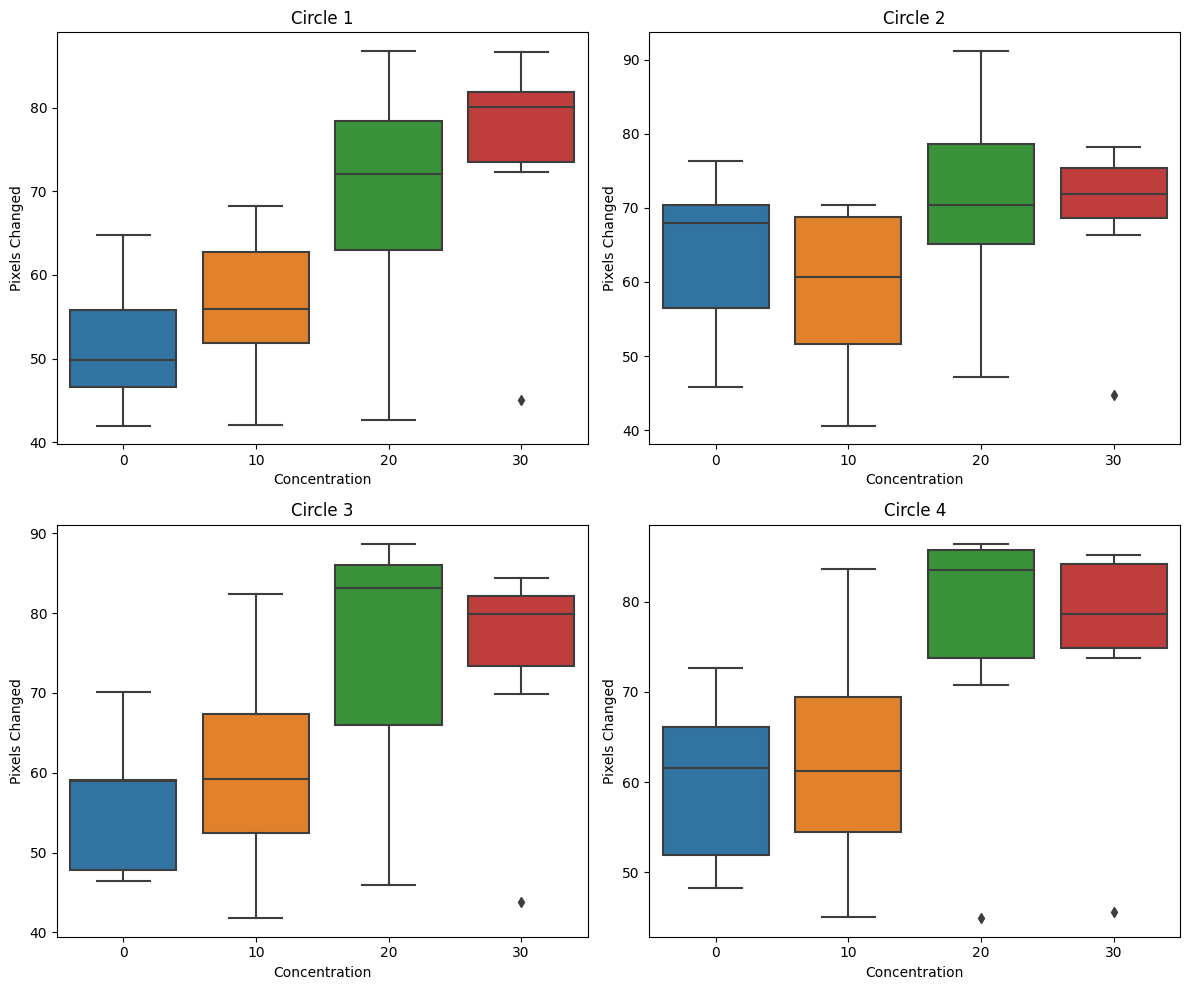

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sampleNumber = 4
filtered_df = df[df['Sample Number'] == sampleNumber]
# Grouping and Aggregation: Mean Pixels Changed by Concentration for each circle
mean_pixels_circle1 = filtered_df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 1 Pixels Changed'].mean().reset_index()
mean_pixels_circle2 = filtered_df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 2 Pixels Changed'].mean().reset_index()
mean_pixels_circle3 = filtered_df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 3 Pixels Changed'].mean().reset_index()
mean_pixels_circle4 = filtered_df.groupby(['Concentration-val', 'Sample Type', 'Sample Number'])['Circle 4 Pixels Changed'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Plot boxplots for Circle 1
sns.boxplot(x='Concentration-val', y='Circle 1 Pixels Changed', data=mean_pixels_circle1, ax=axes[0, 0])
axes[0, 0].set_title('Circle 1')
axes[0, 0].set_xlabel('Concentration')
axes[0, 0].set_ylabel('Pixels Changed')

# Plot boxplots for Circle 2
sns.boxplot(x='Concentration-val', y='Circle 2 Pixels Changed', data=mean_pixels_circle2, ax=axes[0, 1])
axes[0, 1].set_title('Circle 2')
axes[0, 1].set_xlabel('Concentration')
axes[0, 1].set_ylabel('Pixels Changed')

# Plot boxplots for Circle 3
sns.boxplot(x='Concentration-val', y='Circle 3 Pixels Changed', data=mean_pixels_circle3, ax=axes[1, 0])
axes[1, 0].set_title('Circle 3')
axes[1, 0].set_xlabel('Concentration')
axes[1, 0].set_ylabel('Pixels Changed')

# Plot boxplots for Circle 4
sns.boxplot(x='Concentration-val', y='Circle 4 Pixels Changed', data=mean_pixels_circle4, ax=axes[1, 1])
axes[1, 1].set_title('Circle 4')
axes[1, 1].set_xlabel('Concentration')
axes[1, 1].set_ylabel('Pixels Changed')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


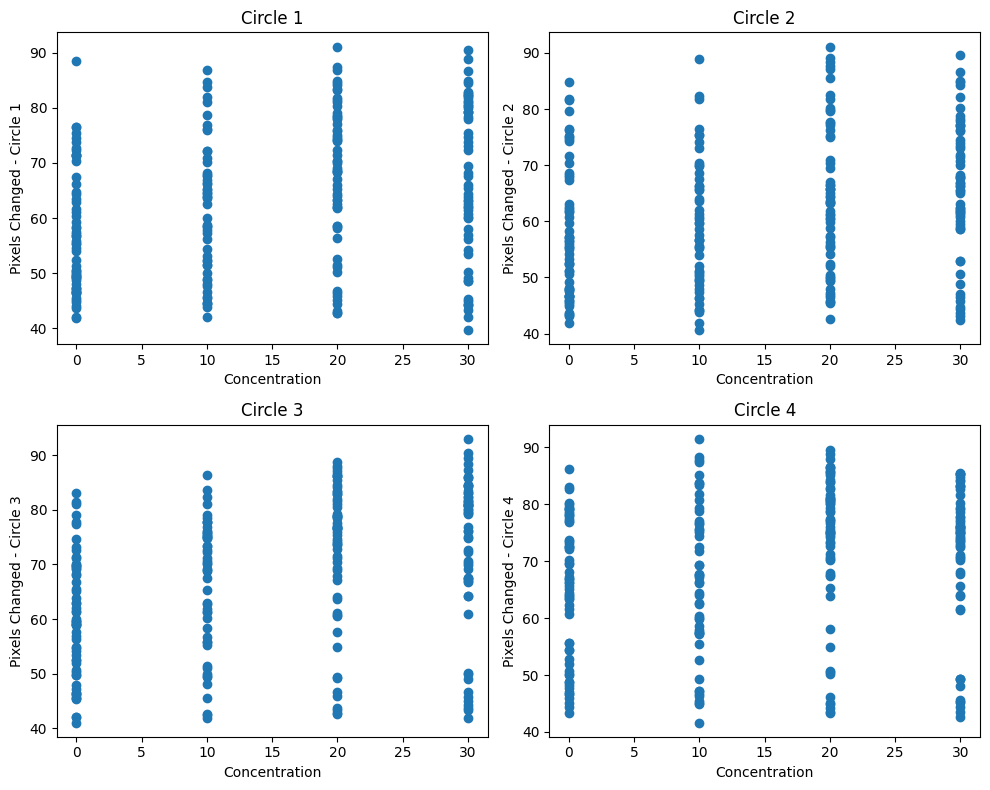

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'Sample Name', 'Circle 1 Intensity Change', 'Circle 2 Intensity Change', 'Circle 3 Intensity Change', 'Circle 4 Intensity Change'

# Create a dictionary mapping concentration values to corresponding numeric values
concentration_mapping = {'0mM': 0, '10mM': 10, '20mM': 20, '30mM': 30}

# Create a new column 'Concentration-val' based on the mapping
df['Concentration-val'] = df['Concentration'].map(concentration_mapping)

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot intensity change for each circle in a subplot
axs[0, 0].scatter(df['Concentration-val'], df['Circle 1 Pixels Changed'])
axs[0, 0].set_xlabel("Concentration")
axs[0, 0].set_ylabel("Pixels Changed - Circle 1")
axs[0, 0].set_title("Circle 1")

axs[0, 1].scatter(df['Concentration-val'], df['Circle 2 Pixels Changed'])
axs[0, 1].set_xlabel("Concentration")
axs[0, 1].set_ylabel("Pixels Changed - Circle 2")
axs[0, 1].set_title("Circle 2")

axs[1, 0].scatter(df['Concentration-val'], df['Circle 3 Pixels Changed'])
axs[1, 0].set_xlabel("Concentration")
axs[1, 0].set_ylabel("Pixels Changed - Circle 3")
axs[1, 0].set_title("Circle 3")

axs[1, 1].scatter(df['Concentration-val'], df['Circle 4 Pixels Changed'])
axs[1, 1].set_xlabel("Concentration")
axs[1, 1].set_ylabel("Pixels Changed - Circle 4")
axs[1, 1].set_title("Circle 4")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

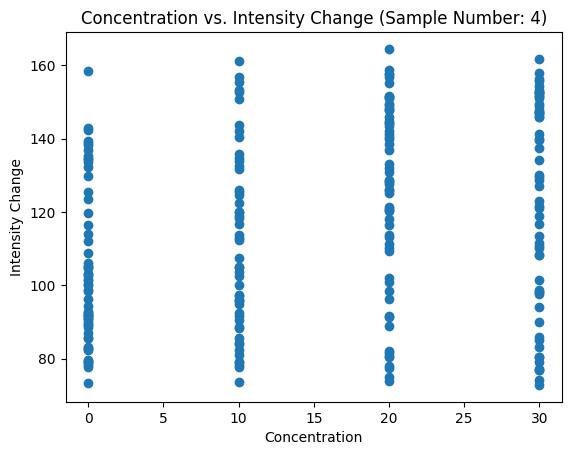

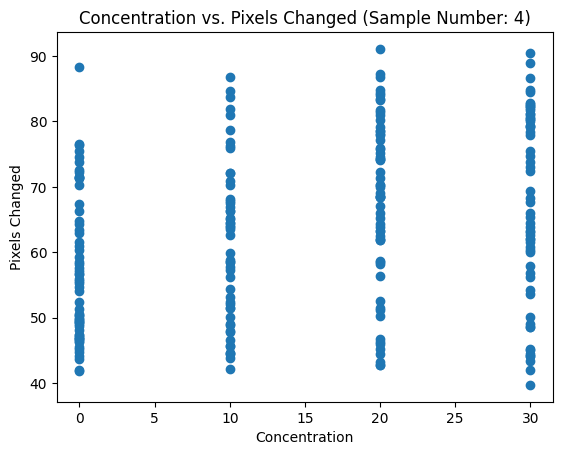

Correlation (Intensity Change): 0.2956867320897546
Correlation (Pixels Changed): 0.3041254494012795
Mean Intensity Change by Concentration:
Concentration-val
0     104.117322
10    111.589580
20    124.512010
30    122.539688
Name: Circle 1 Intensity Change, dtype: float64
Mean Pixels Changed by Concentration:
Concentration-val
0     57.210460
10    61.322085
20    67.668868
30    66.998137
Name: Circle 1 Pixels Changed, dtype: float64
T-test result (Intensity Change):
Ttest_indResult(statistic=nan, pvalue=nan)


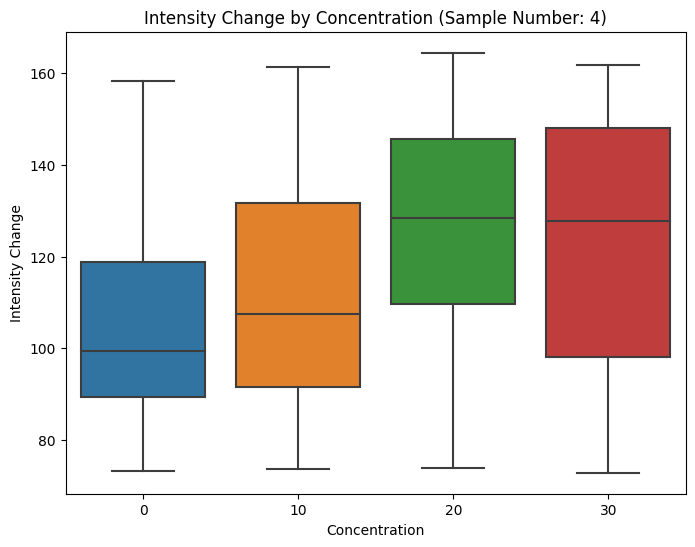

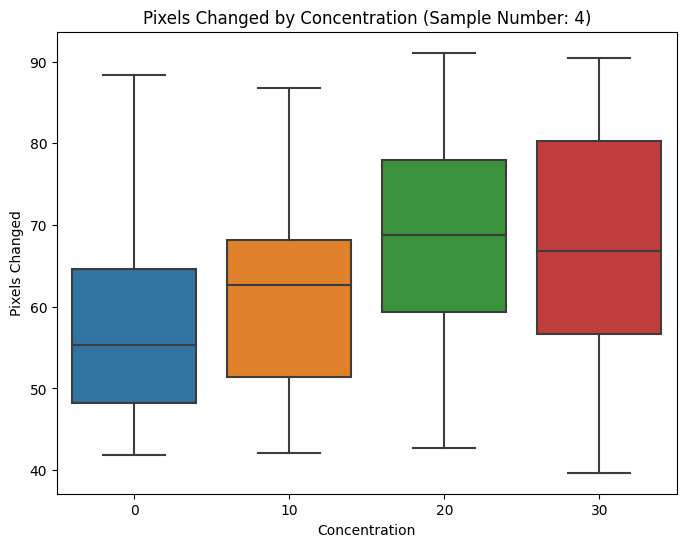

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

concentration_mapping = {'0mM': 0, '10mM': 10, '20mM': 20, '30mM': 30}

# Create a new column 'Concentration-val' based on the mapping
df['Concentration-val'] = df['Concentration'].map(concentration_mapping)

sampleNumber = 4
# Filter by sampleNumber
filtered_df = df

# Scatter plot: Concentration vs. Intensity Change
plt.scatter(filtered_df['Concentration-val'], filtered_df['Circle 1 Intensity Change'])
plt.xlabel("Concentration")
plt.ylabel("Intensity Change")
plt.title("Concentration vs. Intensity Change (Sample Number: {})".format(sampleNumber))
plt.show()

# Scatter plot: Concentration vs. Pixels Changed
plt.scatter(filtered_df['Concentration-val'], filtered_df['Circle 1 Pixels Changed'])
plt.xlabel("Concentration")
plt.ylabel("Pixels Changed")
plt.title("Concentration vs. Pixels Changed (Sample Number: {})".format(sampleNumber))
plt.show()

# Correlation analysis: Concentration vs. Intensity Change
correlation_intensity, _ = pearsonr(filtered_df['Concentration-val'], filtered_df['Circle 1 Intensity Change'])
print("Correlation (Intensity Change):", correlation_intensity)

# Correlation analysis: Concentration vs. Pixels Changed
correlation_pixels, _ = pearsonr(filtered_df['Concentration-val'], filtered_df['Circle 1 Pixels Changed'])
print("Correlation (Pixels Changed):", correlation_pixels)

# Grouping and Aggregation: Mean Intensity Change by Concentration
mean_intensity = filtered_df.groupby('Concentration-val')['Circle 1 Intensity Change'].mean()
print("Mean Intensity Change by Concentration:")
print(mean_intensity)

# Grouping and Aggregation: Mean Pixels Changed by Concentration
mean_pixels = filtered_df.groupby('Concentration-val')['Circle 1 Pixels Changed'].mean()
print("Mean Pixels Changed by Concentration:")
print(mean_pixels)

# Statistical Test: T-test between Intensity Change for different Concentrations
ttest_result = ttest_ind(filtered_df[filtered_df['Concentration-val'] == '0mM']['Circle 1 Intensity Change'],
                         filtered_df[filtered_df['Concentration-val'] == '10mM']['Circle 1 Intensity Change'])
print("T-test result (Intensity Change):")
print(ttest_result)

# Statistical Test: One-way ANOVA for Pixels Changed among different Concentrations
# model = ols('Circle 1 Pixels Changed ~ C(Concentration-val)', data=filtered_df).fit()
# anova_table = anova_lm(model)
# print("ANOVA result (Pixels Changed):")
# print(anova_table)

# Visualization: Box plot of Intensity Change by Concentration
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_df['Concentration-val'], y=filtered_df['Circle 1 Intensity Change'])
plt.xlabel("Concentration")
plt.ylabel("Intensity Change")
plt.title("Intensity Change by Concentration (Sample Number: {})".format(sampleNumber))
plt.show()

# Visualization: Box plot of Pixels Changed by Concentration
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_df['Concentration-val'], y=filtered_df['Circle 1 Pixels Changed'])
plt.xlabel("Concentration")
plt.ylabel("Pixels Changed")
plt.title("Pixels Changed by Concentration (Sample Number: {})".format(sampleNumber))
plt.show()


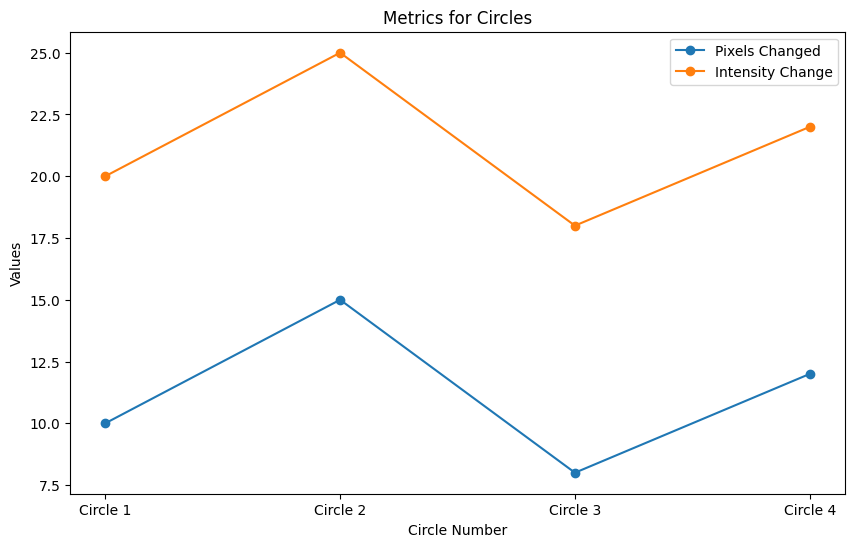

In [1]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
metrics = [
    [10, 20],   # Circle 1: [Pixels Changed, Intensity Change]
    [15, 25],   # Circle 2: [Pixels Changed, Intensity Change]
    [8, 18],    # Circle 3: [Pixels Changed, Intensity Change]
    [12, 22],   # Circle 4: [Pixels Changed, Intensity Change]
]

# Extracting the circle numbers and corresponding values
circle_numbers = list(range(1, 5))  # Assuming there are 4 circles (adjust accordingly)
pixels_changed = [metrics[i][0] for i in range(4)]
intensity_change = [metrics[i][1] for i in range(4)]

# Plotting the values
plt.figure(figsize=(10, 6))
plt.plot(circle_numbers, pixels_changed, label='Pixels Changed', marker='o')
plt.plot(circle_numbers, intensity_change, label='Intensity Change', marker='o')

# Adding labels and title
plt.xlabel('Circle Number')
plt.ylabel('Values')
plt.title('Metrics for Circles')
plt.legend()

# Set x-axis tick positions and labels to display as "Circle 1", "Circle 2", etc.
plt.xticks(circle_numbers, [f'Circle {i}' for i in circle_numbers])

# Display the plot
plt.show()


Blank_iphone_10 cm_white lighting_angle 1.jpg
Working on baseImage..
4
4


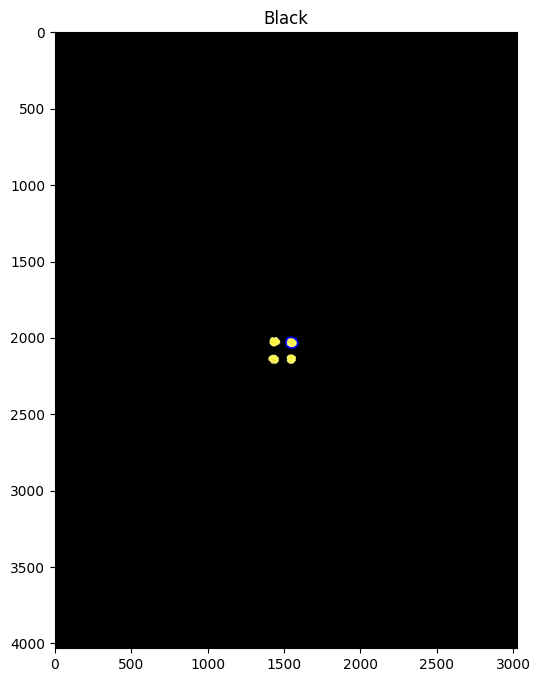

4
4
Working on image..
4


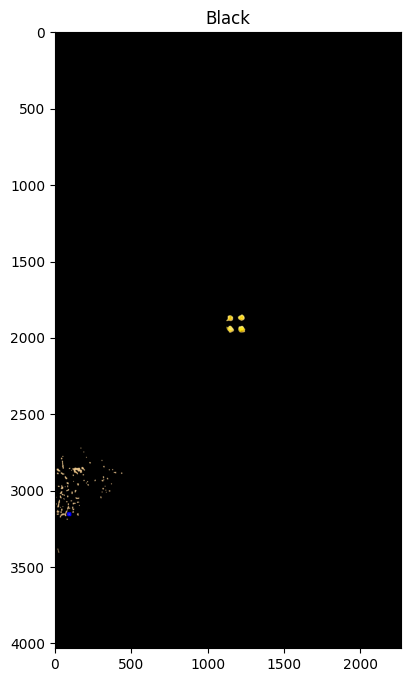

4
Missing image regions 0


AttributeError: 'NoneType' object has no attribute 'shape'

In [1]:
import cv2
import matplotlib.pyplot as plt
from color_utils import extractColoredBoundingBox, getFinalPts, getHeatMapColorDifference
from image_utils import extract_yellowcircles, changeFormat
from utils import calculateSimilarity,generateResultsSingleImage
import os
base_image_path = "/Users/apparilalith/Desktop/asu/mayolab/woundsensor/stand images/10_cm/BaseImage.png"

# image_path = "wound-sensor-github/Amay/Android 5 cm.jpg"
base_dir = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/stand images/10_cm'
for filename in os.listdir(base_dir):
    
    print(filename)
    image_path = os.path.join(base_dir, filename)
    # try:
    generateResultsSingleImage(base_image_path, image_path, '.')
    
    # except:
        # print('NULL')

In [2]:
!pip install opencv-python

In [ ]:
import os
import subprocess

# Set the path to the Python script
python_script = "python3 main.py"

# Set the constant first file path
first_file_path = "stand images/0mM/Dry/S1(0mM) Dry.jpg"

# Set the input and output directories
input_directory = "/Users/apparilalith/Desktop/asu/mayolab/woundsensor/wound-sensor-github/Amay/"
output_directory = "./results"

# Iterate over all files in the input directory
for input_file in os.listdir(input_directory):
    # Check if the file is a JPEG image
    if input_file.lower().endswith(".jpg"):
        # Construct the full paths
        second_file_path = os.path.join(input_directory, input_file)

        # Run the Python command using subprocess
        command = [python_script, first_file_path, second_file_path, output_directory]
        subprocess.run(command)

print("Execution completed for all files in the 'amay' folder.")


: 

In [1]:
import cv2
import matplotlib.pyplot as plt
from color_utils import extractColoredBoundingBox, getFinalPts, getHeatMapColorDifference
from image_utils import extract_yellowcircles, changeFormat
from utils import calculateSimilarity
image_path = "stand images/30mM/High height/S2(30mM)High height.jpg"
base_image_path = "stand images/30mM/Dry/S2(30mM)Dry.jpg"

croppedBaseImage, croppedImage, main_background, result, similarity = calculateSimilarity(base_image_path, image_path, ' Normal Light')

# Display and save the figures
plt.figure(figsize=(16, 10))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(croppedBaseImage, cv2.COLOR_BGR2RGB))
plt.title("Base Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(croppedImage, cv2.COLOR_BGR2RGB))
plt.title("Image")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(main_background, cv2.COLOR_BGR2RGB),interpolation='none')
plt.title("Heatmap Difference")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(main_background, cv2.COLOR_BGR2RGB), cmap='jet', interpolation='none', alpha=0.35)
plt.title("Overlay")
plt.axis("off")
cbar = plt.colorbar(aspect=8)  # Adjust the aspect ratio here
cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()
plt.close()

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

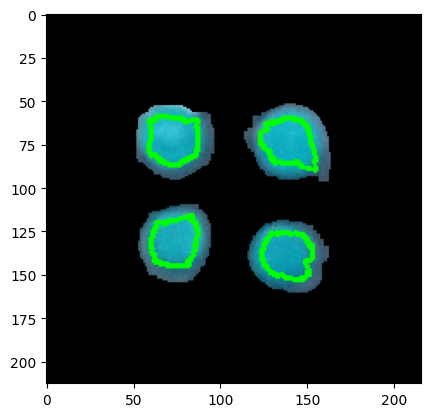

In [9]:
import numpy as np
import imutils
import matplotlib.pyplot as plt
import pytesseract
import cv2
import math
import os
from color_utils import extractColoredBoundingBox, getFinalPts, getHeatMapColorDifference
from image_utils import extract_yellowcircles, changeFormat
from utils import calculateSimilarity

imFilename = "stand images/10mM/Android/S1(10mM)android.jpg"
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)
ima, cropped_im, _, _, yellowArea, yellow_objs = extract_yellowcircles(im, 0.4)
yellow_circles, cropped_im, _, _, yellowArea, yellow_objs = extract_yellowcircles(cropped_im, 0.4)

gray = cv2.cvtColor(yellow_circles, cv2.COLOR_BGR2GRAY)

sigma1 = 1.5
sigma2 = 3.0
ksize = int(2 * round(3 * sigma1) + 1)
blur1 = cv2.GaussianBlur(gray, (ksize, ksize), sigma1)
blur2 = cv2.GaussianBlur(gray, (ksize, ksize), sigma2)
dog = blur1 - blur2

threshold = 100
_, binary = cv2.threshold(dog, threshold, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def filter_blob_contours(contours):
    filtered_contours = []

    for contour in contours:
        filtered_contours.append(shrinkBoundary(contour, 50))
    return filtered_contours

def shrinkBoundary(contour, percent_shrink):
    # Calculate centroid of the contour
    moments = cv2.moments(contour)
    centroid_x = int(moments["m10"] / moments["m00"])
    centroid_y = int(moments["m01"] / moments["m00"])

    # Determine the dimensions of the bounding box
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate the shrinkage offsets based on the bounding box dimensions
    shrinkage_offset_x = int(w * percent_shrink / 200)
    shrinkage_offset_y = int(h * percent_shrink / 200)

    # Create mask image
    mask = np.zeros_like(contour)

    # Iterate over contour points and update the mask image
    for i in range(len(contour)):
        point = contour[i][0]
        x, y = point[0], point[1]
        dx = centroid_x - x
        dy = centroid_y - y
        dist = np.sqrt(dx*dx + dy*dy)
        if dist > 0:
            new_x = int(x + (dx / dist) * shrinkage_offset_x)
            new_y = int(y + (dy / dist) * shrinkage_offset_y)
            mask[i] = [new_x, new_y]
        else:
            mask[i] = [x, y]

    # Extract the shrunken blob using the updated mask
    shrunken_blob = mask.reshape((-1, 1, 2)).astype(np.int32)

    return shrunken_blob

contours = filter_blob_contours(contours)
im_with_contours = cv2.drawContours(yellow_circles.copy(), contours, -1, (0, 255, 0), 2)

# Show the result
plt.figure()
plt.imshow(im_with_contours)


In [ ]:
imFilename = "Samples/0mM/Yellow light/S1(0mM) yellow light.jpg"
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog
from skimage.io import imread

imFilename = "Samples/30mM/Android/S5(30mM)android.jpg"
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)
ima, cropped_im, _, _, yellowArea, yellow_objs = extract_yellowcircles(im, 0.4)
yellow_circles, cropped_im, _, _, yellowArea, yellow_objs = extract_yellowcircles(cropped_im, 0.4)
gray = cv2.cvtColor(yellow_circles, cv2.COLOR_BGR2GRAY)


# Load the image
# image = imread(imFilename, as_gray=True)

min_sigma = 1 
max_sigma = 30  
threshold = 0.1 

blobs = blob_dog(gray, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold)

fig, ax = plt.subplots()
ax.imshow(yellow_circles, cmap='gray')
for blob in blobs:
    y, x, r = blob
    circle = plt.Circle((x, y), r, color='red', fill=False)
    ax.add_patch(circle)
plt.show()

In [ ]:
template = cv2.imread('Samples/0mM/Dry/S1(0mM) Dry.jpg')
# Android
image = cv2.imread('Samples/0mM/Android/S1(0mM)android.jpg')

# Height
# image = cv2.imread('Samples/0mM/High height. normal light/S6(0mM)High height.jpg')

# Left
# image = cv2.imread('Samples/30mM/Left side/S6(30mM)Left side.jpg')

# Right 
# image = cv2.imread('Samples/0mM/Right Side/S6(0mM)Right side.jpg')
# Yellow
# image = cv2.imread('Samples/0mM/Yellow light/S6(0mM) yellow light.jpg')

# Normal Lighting
# image = cv2.imread('Samples/30mM/Normal lighting/S6(30mM) Normal light.jpg')
_, cropped_im,_,_,_,_ = extract_yellowcircles(image)
_, cropped_template,_,_,_,_ = extract_yellowcircles(template)

print("Aligning images ...")
fig, axes = plt.subplots(1, 2, figsize = (8,6))
cropped_im = changeFormat(cropped_im)
cropped_template = changeFormat(cropped_template)
axes[0].imshow(cropped_im)
axes[0].set_title('Image ')
axes[1].imshow(cropped_template)
axes[1].set_title('Template')

plt.tight_layout()
plt.show()

imageReg, h = align_images(cropped_im, cropped_template, 200, debug=True)
aligned = imageReg
template = cropped_template
stacked = np.hstack([aligned, template])
overlay = template.copy()
output = aligned.copy()
cv2.addWeighted(overlay, 0.5, output, 0.5, 0, output)
plt.figure(figsize=(8, 6))
plt.imshow(stacked)
plt.title('Stacked after registration')
plt.figure(figsize=(8, 6))
plt.imshow(output)
plt.title('Overlayed after registration')


In [ ]:
# def remove_text(image):
image = cv2.imread('./Samples/0mM/Dry/S1(0mM) Dry.jpg')

h, w, _ = image.shape
boxes = pytesseract.image_to_boxes(image)
print()

text_regions = []
for line in boxes.splitlines():
    char, x, y, w, h, _ = line.split(' ')
    x, y, w, h = int(x), int(y), int(w), int(h)
    if(char =='S'):
        left_loc = (x,y)
        print(x,y)
    if(char == ')'):
        right_loc = (x,y)
        print(x,y)
    text_regions.append((x, y, x + w, y + h))

for region in text_regions:
    x1, y1, x2, y2 = region
    cv2.circle(image, (x1, h - y1), 10, (0, 0, 255), -1)
#     cv2.circle(image, (x2, y2), 10, (0, 0, 255), -1)
plt.figure(figsize=(12,8))
plt.imshow(image)

# Inpaint the text regions using the mask
#     result = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

# return mask


In [ ]:
# Read image to be aligned
imFilename = "Samples/0mM/Android/S4(0mM)android.jpg"
print("Reading image to align : ", imFilename);
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)
image = im
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

 # Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

_, thresh = cv2.threshold(blurred, 100, 200, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(changeFormat(thresh))

imCopy = im.copy()
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
scaleFactor = 2

threshold_area = 0
threshold_color = 50
black_objects = []
for _, c in enumerate(contours):

    boundRect = cv2.boundingRect(c)

    rectX = int(boundRect[0])
    rectY = int(boundRect[1])
    rectWidth = int(boundRect[2])
    rectHeight = int(boundRect[3])

    contourArea = rectHeight * rectWidth

    referenceRatio = 1.0
    contourRatio = rectWidth / rectHeight
    epsilon = 1.1
    ratioDifference = abs(referenceRatio - contourRatio)
    print((ratioDifference, contourArea))

    color = (0, 0, 255)
        
    if ratioDifference <= epsilon:  
        minArea = 50 * scaleFactor
        maxArea = 120 * minArea

        if minArea <= contourArea < maxArea:  
            mask = np.zeros_like(gray)
            cv2.drawContours(mask, [c], 0, 255, -1)
            mean_color = cv2.mean(image, mask=mask)[:3]  # BGR format
            
            if mean_color[0] > threshold_color and mean_color[1] > threshold_color and mean_color[2] > threshold_color:
                M = cv2.moments(c)
                centroid_x = int(M['m10'] / M['m00'])
                centroid_y = int(M['m01'] / M['m00'])
                
                black_objects.append((centroid_x, centroid_y))
                croppedChar = im[rectY:rectY + rectHeight, rectX:rectX + rectWidth]
                plt.figure()
                plt.imshow(croppedChar)

            color = (0, 255, 0)

    cv2.rectangle(imCopy, (int(rectX), int(rectY)),
                  (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2)

plt.figure(figsize=(16,10))
plt.imshow(imCopy)

In [ ]:
import math

image = cv2.imread('./Samples/0mM/Dry/S1(0mM) Dry.jpg')
src = cv2.imread('./Samples/0mM/Dry/S1(0mM) Dry.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.Canny(src, 50, 200, None, 3)
plt.figure()
plt.imshow(dst)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 10, 50)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)


plt.figure()
plt.imshow(cdstP)


In [ ]:
# Find the large circle and fing contours and filter the contours based on black color and find cicles which have black colored contour regions inside them
# Load the image
image = cv2.imread('Samples/0mM/Yellow light/S10(0mM) Yellow light.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
# blur = cv2.GaussianBlur(gray, (5, 5), 0)
blurred = cv2.GaussianBlur(gray, (0, 0), 3)
sharpened = cv2.addWeighted(gray, 1.5, blurred, -0.5, 0)

circles = cv2.HoughCircles(sharpened, cv2.HOUGH_GRADIENT, dp=1, minDist=500,
                           param1=50, param2=30, minRadius=150, maxRadius=250)

if circles is not None:
    circles = np.round(circles[0, :]).astype(int)
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 5)


_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

threshold_area = 0
threshold_color = 50
black_objects = []
for contour in contours:
    area = cv2.contourArea(contour)
    
    if area > threshold_area:
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [contour], 0, 255, -1)
        mean_color = cv2.mean(image, mask=mask)[:3]  # BGR format
        
        if mean_color[0] < threshold_color and mean_color[1] < threshold_color and mean_color[2] < threshold_color:
            M = cv2.moments(contour)
            centroid_x = int(M['m10'] / M['m00'])
            centroid_y = int(M['m01'] / M['m00'])
            
            black_objects.append((centroid_x, centroid_y))

for (x, y) in black_objects:
    cv2.circle(image, (x, y), 10, (255, 0, 255), -1)

final_circles = []

for (x, y, r) in circles:
    for (p, q) in black_objects:
        if  (x-p) * (x-p) + (y-q) * (y-q) <= r*r:
            final_circles.append((x,y,r))
            cv2.circle(image, (x, y), r, (255, 0, 0), 10)

plt.figure(figsize=(10,8))
plt.imshow(image)

In [ ]:
# Test Contour function
import cv2
import numpy as np

# Load the image
image = cv2.imread('Samples/0mM/Android/S1(0mM)android.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

_, binary = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
# _, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

threshold_area = 0
threshold_color = 150
black_objects = []
for contour in contours:
    area = cv2.contourArea(contour)
    # print(area)
    if area > threshold_area:
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [contour], 0, 255, -1)
        mean_color = cv2.mean(image, mask=mask)[:3]  # BGR format
        print(mean_color)
        if mean_color[0] < threshold_color and mean_color[1] < threshold_color and mean_color[2] < threshold_color:
            M = cv2.moments(contour)
            centroid_x = int(M['m10'] / M['m00'])
            centroid_y = int(M['m01'] / M['m00'])
            
            black_objects.append((centroid_x, centroid_y))

for (x, y) in black_objects:
    cv2.circle(image, (x, y), 10, (255, 0, 255), -1)


plt.figure(figsize=(10,8))
plt.imshow(image)

In [ ]:
# Extract circles
import numpy as np
import imutils
import matplotlib.pyplot as plt
import pytesseract
import cv2
image = cv2.imread('Samples/0mM/Yellow light/S10(0mM) Yellow light.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# blur = cv2.GaussianBlur(gray, (5, 5), 0)
blurred = cv2.GaussianBlur(gray, (0, 0), 3)
sharpened = cv2.addWeighted(gray, 1.5, blurred, -0.5, 0)
plt.figure()
plt.imshow(blurred)
# Apply Hough circle detection to detect circles
circles = cv2.HoughCircles(sharpened, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=20, maxRadius=50)

if circles is not None:
    circles = np.round(circles[0, :]).astype(int)
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 5)

plt.figure(figsize=(10,8))
plt.imshow(image)

In [ ]:
# Filtering yellow regions
import cv2
import numpy as np

image = cv2.imread('Samples/0mM/Android/S1(0mM)android.jpg')
yellow_circles, cropped, maxRadius, circled_image = extract_yellowcircles(image)
# gray = cv2.cvtColor(yellow_circles, cv2.COLOR_BGR2GRAY)
# _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contour_image = yellow_circles.copy()
# cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(yellow_circles, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


gray = cv2.cvtColor(yellow_circles, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (0, 0), 3)
sharpened = cv2.addWeighted(gray, 1.5, blurred, -0.5, 0)
# plt.figure()
# plt.imshow(blurred)

widthThresh = 0.2
minWidth = int(maxRadius - widthThresh * maxRadius)
maxWidth = int(maxRadius + widthThresh * maxRadius)
circles = cv2.HoughCircles(sharpened, cv2.HOUGH_GRADIENT, dp=1, minDist=1, param1=50, param2=30, minRadius=minWidth, maxRadius=maxWidth)

if circles is not None:
    circles = np.round(circles[0, :]).astype(int)

    average_radius = np.mean(circles[:, 2])
    median_radius = np.median(circles[:, 2])

    centroid_x = np.mean(circles[:, 0])
    centroid_y = np.mean(circles[:, 1])

    # ellipse = cv2.fitEllipse(circles[:, :2])

    print("Average Radius:", average_radius)
    print("Median Radius:", median_radius)
    print("Centroid (x, y):", centroid_x, centroid_y)
    # print("Ellipse (center, size, angle):", ellipse)

    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 2)

    # cv2.ellipse(image, ellipse, (255, 0, 0), 2)

plt.figure(figsize=(16,8))
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

# plt.figure(figsize=(16,8))
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extractColoredBoundingBox(im, color):
    # Define the lower and upper threshold values for the desired color in HSV
    lower_hsv = color_thresholds[color]['lower_hsv']
    upper_hsv = color_thresholds[color]['upper_hsv']

    # Define the threshold for mean_color variable
    color_threshold = color_thresholds[color]['color_threshold']
    image = im

    # Convert image to HSV color space
    hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

    # Create a mask based on the specified color range
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(mask, (5, 5), 0)

    # plt.figure()
    # plt.imshow(blurred)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(blurred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(cropped_im, contours, -1, (0, 255, 0), 2)
    # Define parameters and empty list for storing results
    scaleFactor = 2
    threshold_area = 0
    round_objects = []
    print(len(contours))
    # Iterate over contours
    for i, c in enumerate(contours):
        boundRect = cv2.boundingRect(c)
        rectX = int(boundRect[0])
        rectY = int(boundRect[1])
        rectWidth = int(boundRect[2])
        rectHeight = int(boundRect[3])
        contourArea = cv2.contourArea(c)

        referenceRatio = 1.0
        contourRatio = rectWidth / rectHeight
        epsilon = 1.1
        ratioDifference = abs(referenceRatio - contourRatio)

        centroids = []
        # Blue: Filtered
        color = (0, 0, 255)
        minArea = yellowArea * 0.4
        maxArea = 1.5 * yellowArea
        # print(yellowArea)
        if ratioDifference <= epsilon:
            if minArea <= contourArea < maxArea:
                mask = np.zeros_like(mask)
                cv2.drawContours(mask, [c], 0, 255, -1)
                mean_color = cv2.mean(hsv, mask=mask)[:3]  # HSV format
                color_check = True
                if color == 'white' and mean_color[2] < color_threshold:
                    color_check = False
                if color == 'black' and mean_color[2] > color_threshold:
                    color_check = False
                if color_check:
                    M = cv2.moments(c)
                    centroid_x = int(M['m10'] / M['m00'])
                    centroid_y = int(M['m01'] / M['m00'])

                    round_objects.append((centroid_x, centroid_y))
                    croppedChar = im[rectY:rectY + rectHeight, rectX:rectX + rectWidth]
                    # plt.figure()
                    # plt.imshow(croppedChar)
                else:
                    print("Color Check failed", mean_color)
                # Green: Detected bounding box
                color = (0, 255, 0)
            else:
                print("Area Check failed", contourArea, minArea, maxArea, yellowArea)
        # for (x,y) in round_objects:
            # cv2.circle(cropped_im, (x, y), 3, (0, 255, 0), 2)
        # cv2.rectangle(im, (int(rectX), int(rectY)),
        #               (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2)

    return cropped_im, im, round_objects


# imFilename = "Samples/0mM/Right Side/S7(0mM)Right side.jpg"

# print("Reading image to align: ", imFilename)
# im = cv2.imread(imFilename, cv2.IMREAD_COLOR)
# _, cropped_im,_,_, yellowArea = extract_yellowcircles(im)
# yellow_circles, cropped_im,_,_, yellowArea = extract_yellowcircles(cropped_im)
# plt.figure()
# plt.imshow(yellow_circles)
# plt.title('cropp')


# Define color thresholds for black, white, and yellow
color_thresholds = {
    'black': {
        'lower_hsv': np.array([0, 0, 0]),
        'upper_hsv': np.array([179, 255, 50]),
        'color_threshold': 70
    },
    'white': {
        'lower_hsv': np.array([0, 0, 200]),
        'upper_hsv': np.array([179, 50, 255]),
        'color_threshold': 150
    },
    'yellow': {
        'lower_hsv': np.array([20, 100, 100]),
        'upper_hsv': np.array([40, 255, 255]),
        'color_threshold': 120
    }
}

color = 'black'
import math

imFilename = "Samples/0mM/Yellow light/S1(0mM) yellow light.jpg"
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)
ima, cropped_im,_,_, yellowArea,yellow_objs = extract_yellowcircles(im, 0.3)
blackCroppedbbIm, blackbbIm, black_objs = extractColoredBoundingBox(cropped_im.copy(), 'black')
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)
whiteCroppedbbIm, whitebbIm, white_objs = extractColoredBoundingBox(cropped_im.copy(), 'white')

# Display the annotated image
# plt.figure(figsize=(10, 8))
# plt.imshow(changeFormat(blackCroppedbbIm))
# plt.title('Black')
# plt.show()
# plt.figure(figsize=(10, 8))
# plt.imshow(changeFormat(whiteCroppedbbIm))
# plt.title('white')
# plt.show()

im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

ima, cropped_im,_,_, yellowArea,yellow_objs = extract_yellowcircles(cropped_im, 0.3)

for (x,y,bb) in yellow_objs:
    cv2.circle(cropped_im ,(x,y), 2, (255, 0, 0), 2)

for (x,y) in black_objs:
    cv2.circle(cropped_im ,(x,y), 2, (0, 255, 0), 2)

for (x,y) in white_objs:
    cv2.circle(cropped_im ,(x,y), 2, (0, 0, 255), 2)

# plt.figure(figsize=(10,8))
# plt.imshow(changeFormat(ima))
plt.title('Yellow')
plt.show()

def getFinalPts(black_objs, white_objs, yellow_objs):
    print('black objs', black_objs)
    print('white objs', white_objs)
    print('yellow objs', yellow_objs)
    def filterPts(objs, yellow_objs):
        if(len(objs)==0):
            return []
        pts = np.array([(x,y) for x,y,b in yellow_objs], dtype=np.int32)
        pts = pts.reshape((-1, 1, 2))
        final = []
        for pt in objs:
            if cv2.pointPolygonTest(pts, pt, False) < 0:
                final.append(pt)
        return final
    black_objs = filterPts(black_objs, yellow_objs)
    white_objs = filterPts(white_objs, yellow_objs)

    min_dist = float('inf')
    min_ypt = None
    min_wpt = None
    obj = white_objs
    if(len(white_objs)==0):
        obj = black_objs
    for wx,wy in obj:
        for yx, yy, bb in yellow_objs:
            dist = math.sqrt((wx - yx)**2 + (wy - yy)**2)
            if(dist < min_dist):
                min_dist = dist
                min_ypt = (yx, yy, bb)
                min_wpt = (wx, wy)
    # print(min_wpt, min_ypt)
    def distance_to_line(point, line_point1, line_point2):
        x, y = point
        x1, y1 = line_point1
        x2, y2 = line_point2
        numerator = abs((y2 - y1) * x - (x2 - x1) * y + x2 * y1 - y2 * x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        return numerator / denominator

    second_mindist = float('inf')
    second_minypt = None

    for yx, yy, bb in yellow_objs:
        if yx == min_ypt[0] and yy == min_ypt[1] :
            continue
        distance = distance_to_line((yx, yy), min_wpt, min_ypt[:2])
        # print(distance, yx, yy)
        if distance < second_mindist:
            second_mindist = distance
            second_minypt = (yx, yy, bb)

    top_pts =[min_ypt, second_minypt]
    bottom_pts = []

    for yx, yy, bb in yellow_objs:
        if (yx, yy, bb) not in top_pts:
            bottom_pts.append((yx, yy, bb))
    
    # print(top_pts)
    if len(white_objs)==0:
        top_pts[:], bottom_pts[:] = bottom_pts[:], top_pts[:]
        
    def calculate_cross_product(p1, p2, p3):
        # Calculate the cross product of vectors (p2 - p1) and (p3 - p1)
        cross_product = (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p3[0] - p1[0]) * (p2[1] - p1[1])
        return cross_product
    final_order = [None]*4
    if(calculate_cross_product(top_pts[0], top_pts[1], bottom_pts[0]) > 0):
        final_order[0] = top_pts[0]
        final_order[1] = top_pts[1]
    else:
        final_order[0] = top_pts[1]
        final_order[1] = top_pts[0]

    if(calculate_cross_product(bottom_pts[0], bottom_pts[1], top_pts[0]) > 0):
        final_order[2] = bottom_pts[0]
        final_order[3] = bottom_pts[1]
    else:
        final_order[2] = bottom_pts[1]
        final_order[3] = bottom_pts[0]

    return final_order

# print(getFinalPts(black_objs, white_objs, yellow_objs))